<a href="https://colab.research.google.com/github/Alexandre77777/data_mining/blob/main/6.%20%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F%20%D0%B8%20%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F%20%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%968_%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D0%B8_%D0%BB%D0%BE%D0%B3%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическая работа №8. Линейная и логистическая регрессия**

## **Линейная регрессия**


###  **Задание №1. Прогнозирование продаж автомобилей**:


   - **Шаг 1**: Загрузите набор данных о продажах автомобилей, содержащий информацию о цене, возрасте, пробеге и других характеристиках.
     - **Совет**: Проверьте данные на наличие пропущенных значений и выбросов. Используйте `pandas` для обнаружения пропусков (`df.isnull().sum()`) и выбросов (например, с помощью метода межквартильного размаха - `df.boxplot()`).
     - **Совет**: Для пропущенных значений используйте стратегию заполнения средними значениями или медианой, чтобы минимизировать влияние на распределение данных (`df.fillna()`).

- Ссылка на набор данных: https://www.kaggle.com/datasets/gagandeep16/car-sales

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from google.colab import files

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# uploaded = files.upload()
df = pd.read_csv('/content/Car_sales.csv')

df.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [ ]:
print(df.isnull().sum())

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64


<Axes: >

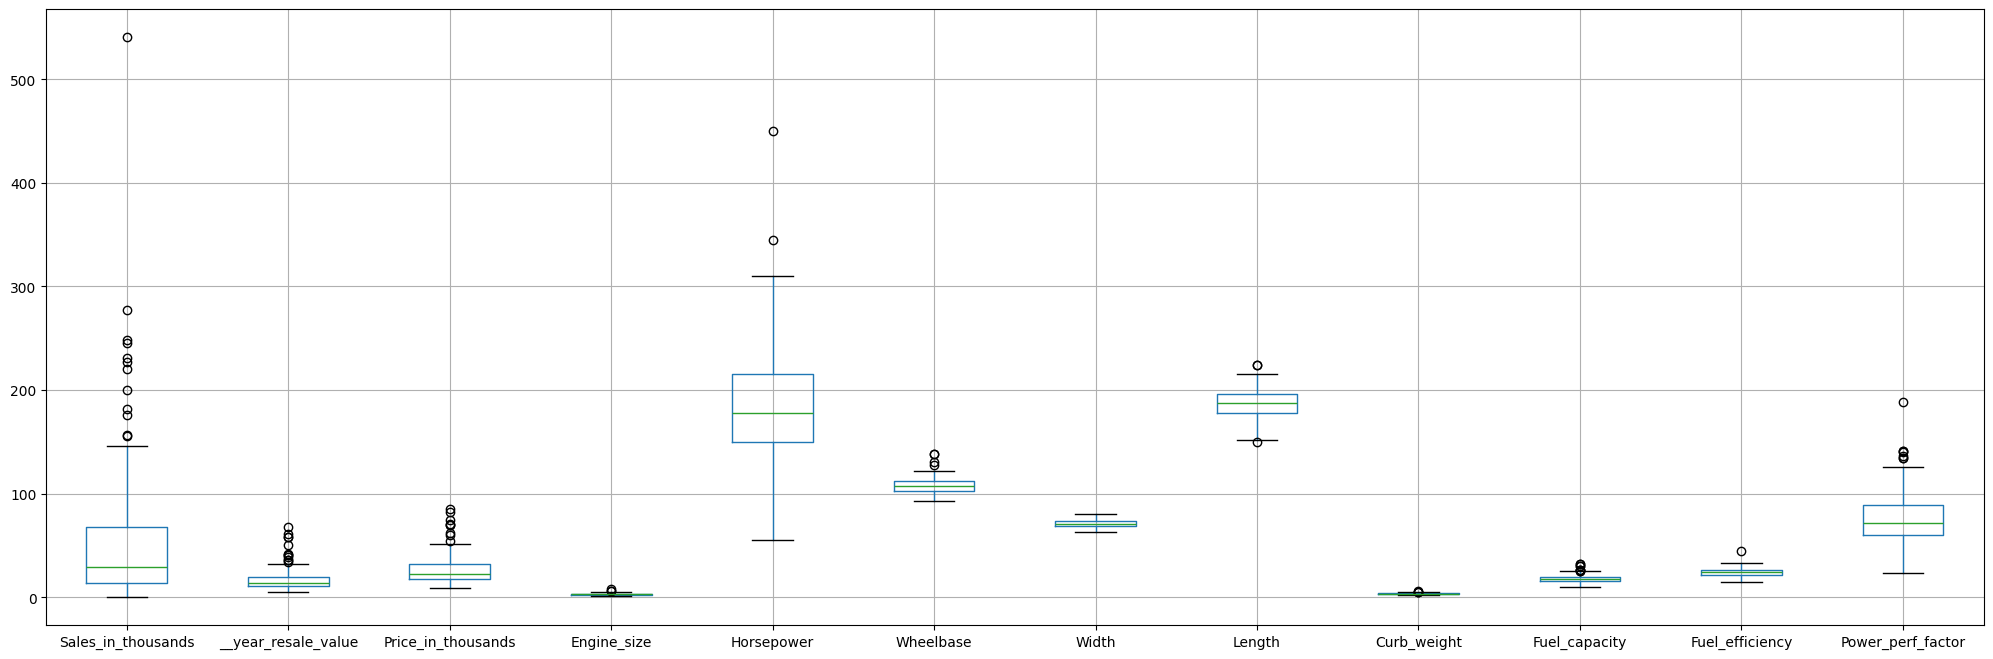

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 8))
df.boxplot()

In [ ]:
#пропуски: __year_resale_value, Price_in_thousands, Engine_size, Horsepower, Wheelbase, Width, Length, Curb_weight, Fuel_capacity, Fuel_efficiency, Power_perf_factor
# Заменить пропущенные значения в столбцах медианой
df['__year_resale_value'].fillna(df['__year_resale_value'].mean(), inplace=True)
df['Price_in_thousands'].fillna(df['Price_in_thousands'].median(), inplace=True)
df['Engine_size'].fillna(df['Engine_size'].median(), inplace=True)
df['Horsepower'].fillna(df['Horsepower'].median(), inplace=True)
df['Wheelbase'].fillna(df['Wheelbase'].median(), inplace=True)
df['Width'].fillna(df['Width'].median(), inplace=True)
df['Length'].fillna(df['Length'].median(), inplace=True)
df['Curb_weight'].fillna(df['Curb_weight'].median(), inplace=True)
df['Fuel_capacity'].fillna(df['Fuel_capacity'].median(), inplace=True)
df['Fuel_efficiency'].fillna(df['Fuel_efficiency'].median(), inplace=True)
df['Power_perf_factor'].fillna(df['Power_perf_factor'].median(), inplace=True)

print(df.isnull().sum())

Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64


<ipython-input-15-98c90075328f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['__year_resale_value'].fillna(df['__year_resale_value'].mean(), inplace=True)
<ipython-input-15-98c90075328f>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method

   - **Шаг 2**: Проведите предварительный анализ данных:
     - Постройте гистограммы для каждого числового признака, чтобы понять их распределение.
     - Постройте диаграммы рассеяния для выявления зависимостей между признаками и целевой переменной (ценой).
     - **Совет**: Используйте корреляционную матрицу для выявления сильных линейных зависимостей между признаками.

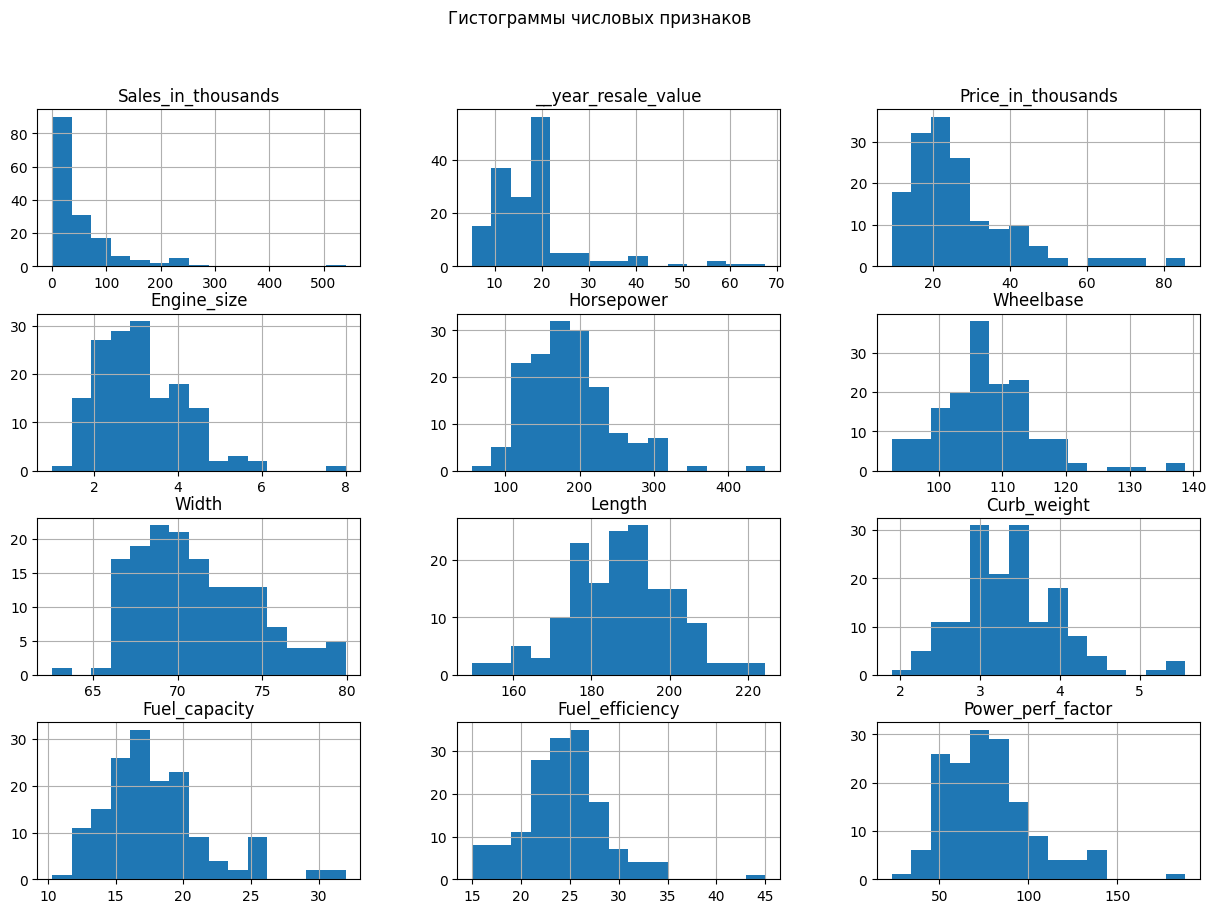

In [ ]:
# Построение гистограмм для каждого числового признака
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Гистограммы числовых признаков')
plt.show()

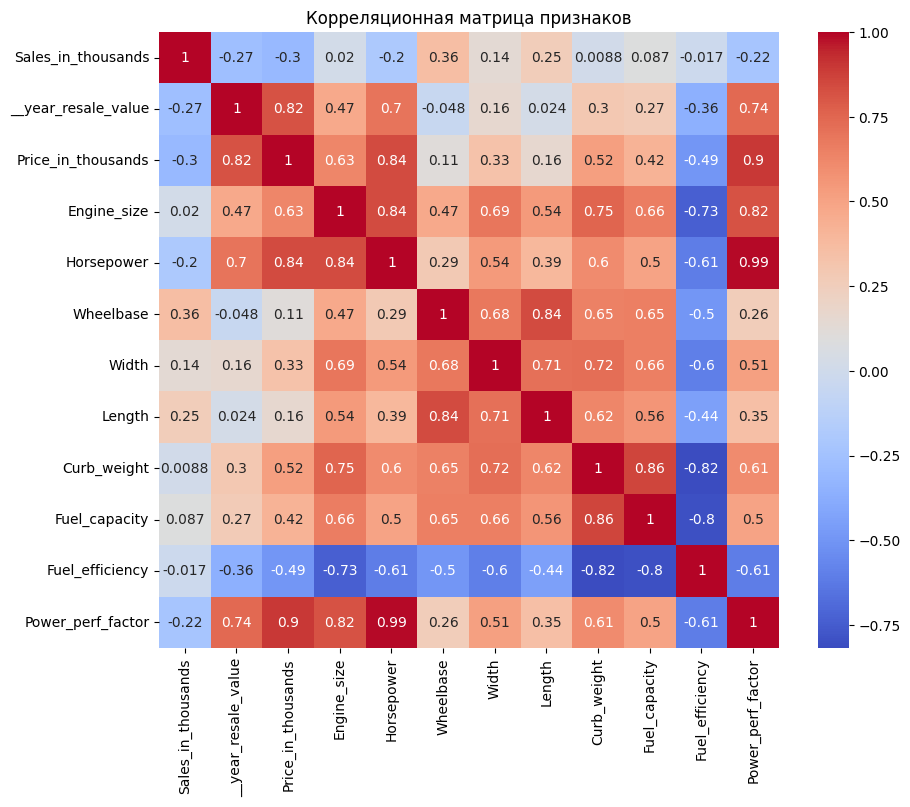

In [ ]:
# Построение корреляционной матрицы
df_new = df.drop(columns=['Manufacturer',	'Model', 'Vehicle_type', 'Latest_Launch'])
corr = df_new.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки (например, 70% на обучение и 30% на тестирование) с помощью `train_test_split` из `sklearn.model_selection`.

In [ ]:
X = df.drop('Price_in_thousands', axis=1)  # Матрица признаков
y = df['Price_in_thousands']               # Целевая переменная

In [ ]:
# Преобразование столбца Latest_Launch
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
X['Launch_Year'] = pd.to_datetime(X['Latest_Launch']).dt.year
X = X.drop('Latest_Launch', axis=1)

In [ ]:
# Преобразование с использованием one-hot encoding
X = pd.get_dummies(X, columns=['Manufacturer', 'Model', 'Vehicle_type'], drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

   - **Шаг 4**: Постройте модель линейной регрессии для предсказания цены автомобиля.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели с помощью `LinearRegression`.

In [ ]:
# Создание модели
model = LinearRegression()

# Обучение модели на обучающих данных
model.fit(X_train, y_train)

LinearRegression()

   - **Шаг 5**: Оцените качество модели с использованием метрик MSE и R².
     - Выведите значения метрик и интерпретируйте их. Обратите внимание на то, насколько хорошо ваша модель предсказывает цены.

In [ ]:
# Предсказание на тестовых данных
y_pred = model.predict(X_test)

In [ ]:
# MSE и RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# R^2
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Среднеквадратическая ошибка (MSE): {mse:.4f}")
print(f"Корень из MSE (RMSE): {rmse:.4f}")
print(f"Коэффициент детерминации (R^2): {r2:.4f}")

Среднеквадратическая ошибка (MSE): 14.6031
Корень из MSE (RMSE): 3.8214
Коэффициент детерминации (R^2): 0.9359


   - **Шаг 6**: Визуализируйте результаты:
     - Постройте график зависимости предсказанных цен от фактических.

In [ ]:
# Создание DataFrame с реальными и предсказанными значениями
results = pd.DataFrame({
    'Real': y_test.values,
    'Predicted': y_pred
})

# Отображение первых 10 значений
display(results.head(10))

,Real,Predicted
0,43.000,35.362668
1,34.605,35.320133
2,22.195,24.301507
3,16.480,14.980054
4,12.640,12.203102
5,19.460,24.625765
6,39.895,41.845763
7,24.150,26.826361
8,21.410,20.211939
9,21.200,22.331555


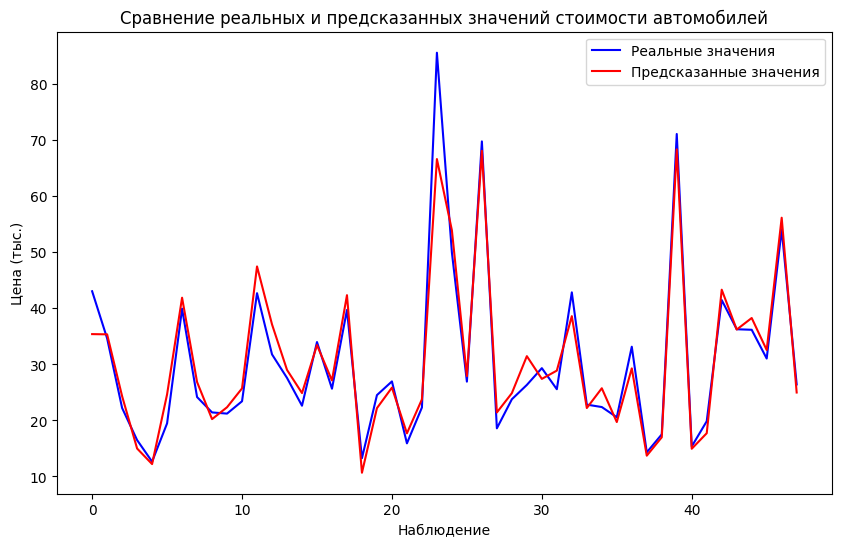

In [ ]:
# Сортировка значений для визуализации
results_sorted = results.sort_index()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(results_sorted['Real'].values, label='Реальные значения', color='blue')
plt.plot(results_sorted['Predicted'].values, label='Предсказанные значения', color='red')
plt.legend()
plt.title('Сравнение реальных и предсказанных значений стоимости автомобилей')
plt.xlabel('Наблюдение')
plt.ylabel('Цена (тыс.)')
plt.show()


### **Задание №2. Влияние погодных условий на урожайность**:


   - **Шаг 1**: Загрузите набор данных о погодных условиях и урожайности сельскохозяйственных культур.
     - **Совет**: Проверьте данные на наличие пропущенных значений и выбросов. Используйте стратегию заполнения пропусков средними значениями или медианой.

- Ссылка на набор данных: https://www.kaggle.com/datasets/waqi786/climate-change-impact-on-agriculture

In [4]:
df = pd.read_csv('/content/climate_change_impact_on_agriculture_2024.csv', sep=',')

df.head()

,Year,Country,Region,Crop_Type,Average_Temperature_C,Total_Precipitation_mm,CO2_Emissions_MT,Crop_Yield_MT_per_HA,Extreme_Weather_Events,Irrigation_Access_%,Pesticide_Use_KG_per_HA,Fertilizer_Use_KG_per_HA,Soil_Health_Index,Adaptation_Strategies,Economic_Impact_Million_USD
0,2001,India,West Bengal,Corn,1.55,447.06,15.22,1.737,8,14.54,10.08,14.78,83.25,Water Management,808.13
1,2024,China,North,Corn,3.23,2913.57,29.82,1.737,8,11.05,33.06,23.25,54.02,Crop Rotation,616.22
2,2001,France,Ile-de-France,Wheat,21.11,1301.74,25.75,1.719,5,84.42,27.41,65.53,67.78,Water Management,796.96
3,2001,Canada,Prairies,Coffee,27.85,1154.36,13.91,3.890,5,94.06,14.38,87.58,91.39,No Adaptation,790.32
4,1998,India,Tamil Nadu,Sugarcane,2.19,1627.48,11.81,1.080,9,95.75,44.35,88.08,49.61,Crop Rotation,401.72


In [5]:
print(df.isnull().sum())

Year                           0
Country                        0
Region                         0
Crop_Type                      0
Average_Temperature_C          0
Total_Precipitation_mm         0
CO2_Emissions_MT               0
Crop_Yield_MT_per_HA           0
Extreme_Weather_Events         0
Irrigation_Access_%            0
Pesticide_Use_KG_per_HA        0
Fertilizer_Use_KG_per_HA       0
Soil_Health_Index              0
Adaptation_Strategies          0
Economic_Impact_Million_USD    0
dtype: int64


<Axes: >

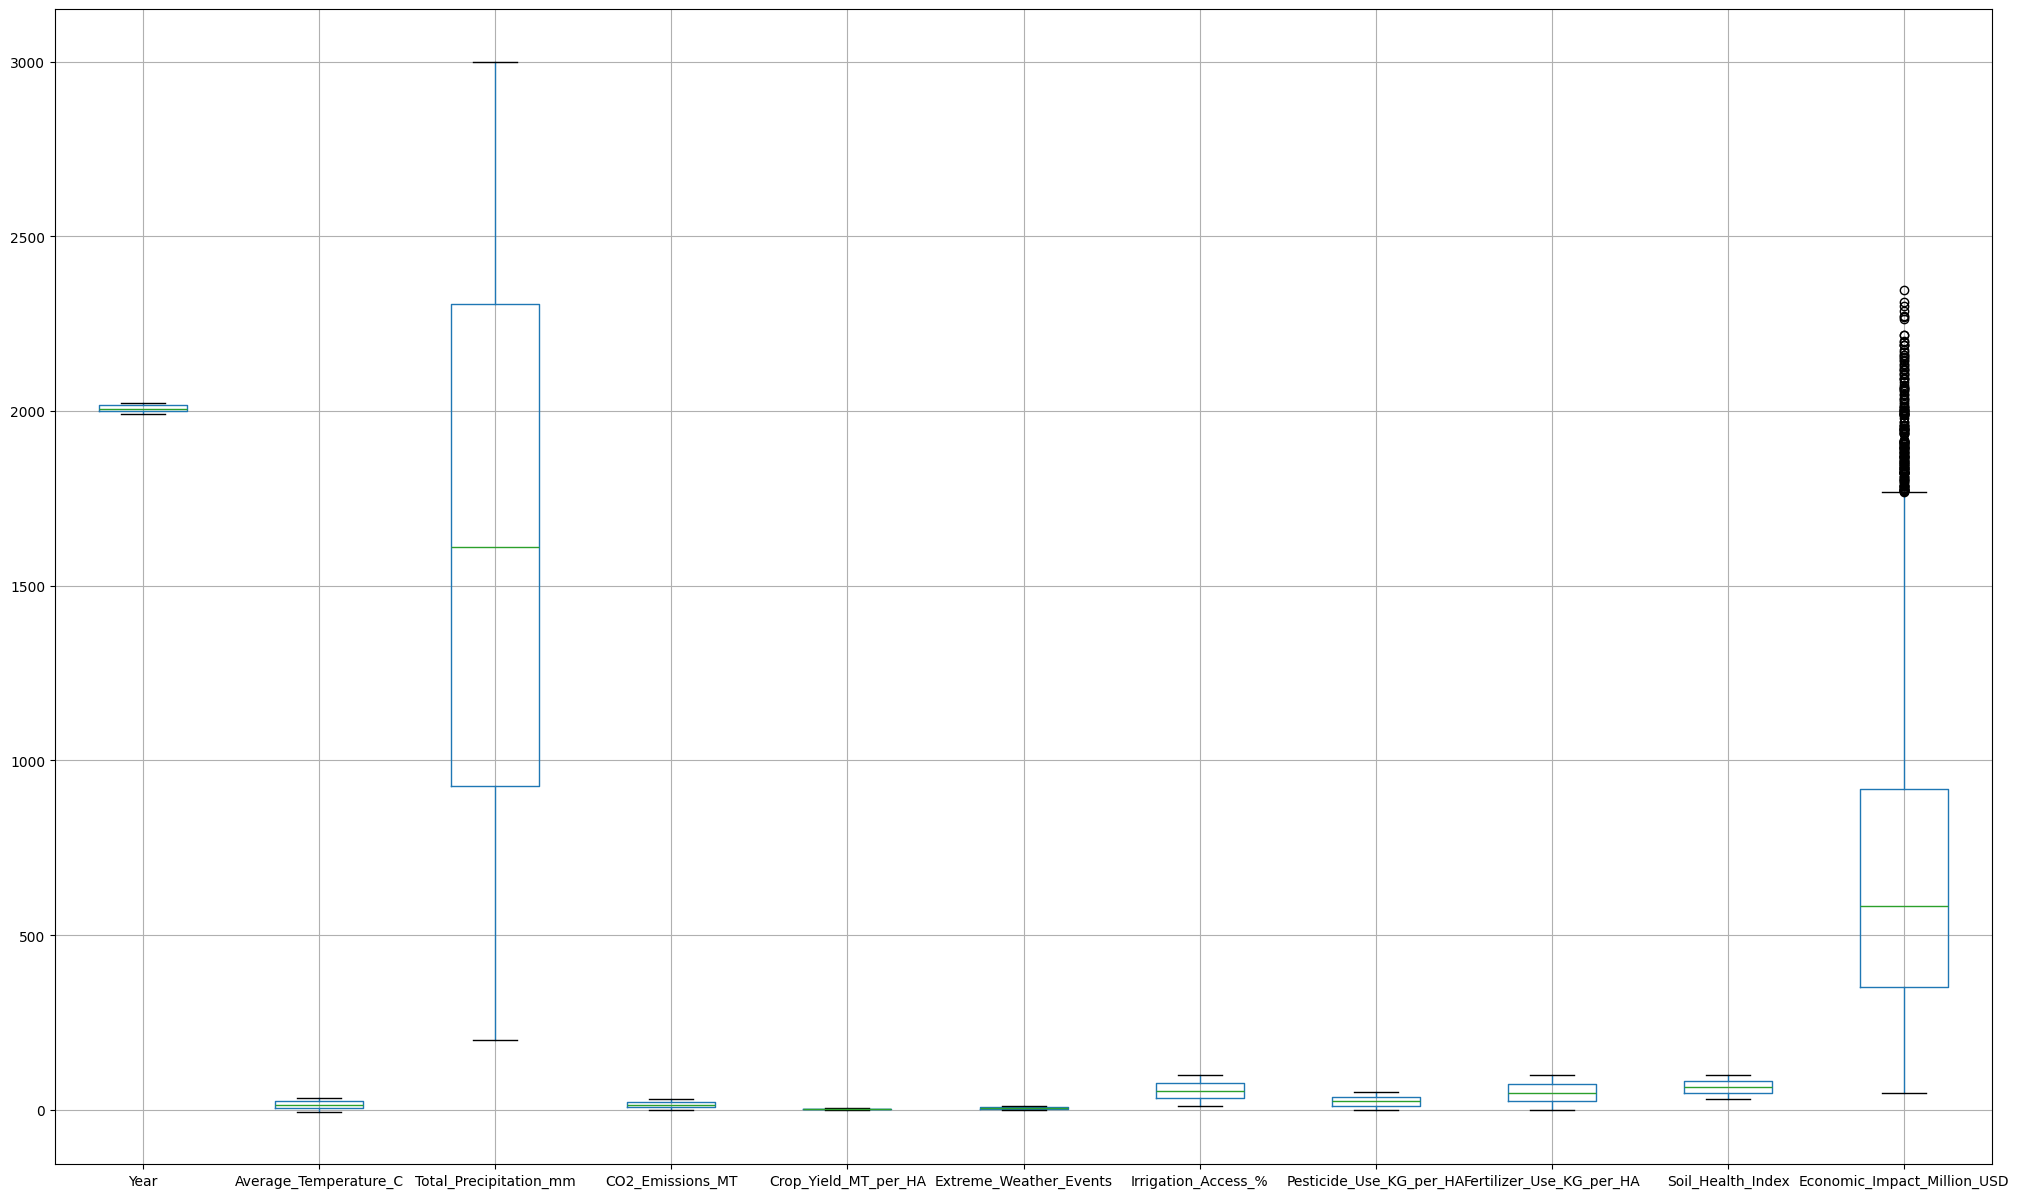

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25, 15))
df.boxplot()

   - **Шаг 2**: Выполните анализ данных:
     - Постройте корреляционную матрицу для выявления зависимостей между признаками.
     - Постройте диаграммы рассеяния для ключевых признаков.
     - **Совет**: Удалите или преобразуйте признаки с низкой корреляцией с целевой переменной, чтобы улучшить модель.

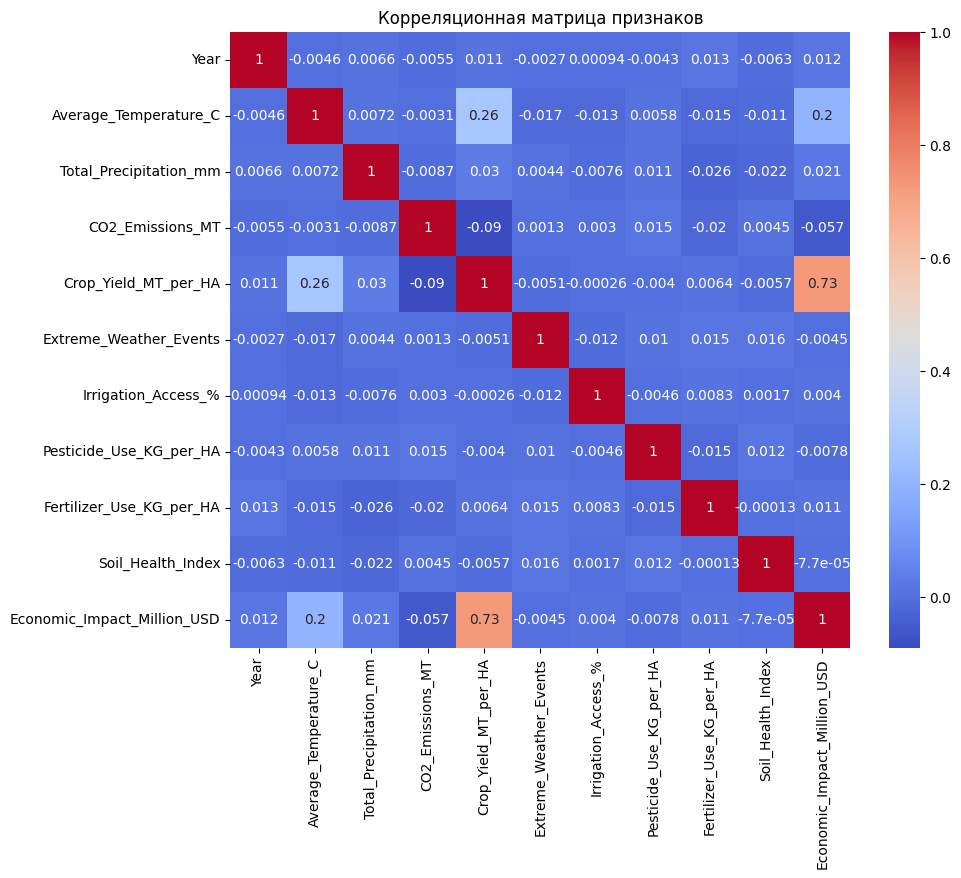

In [7]:
df_new = df.drop(columns=['Country', 'Region', 'Crop_Type', 'Adaptation_Strategies'])
corr_2 = df_new.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_2, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

In [8]:
key_features = ['Average_Temperature_C', 'Total_Precipitation_mm', 'Extreme_Weather_Events']
target = 'Crop_Yield_MT_per_HA'

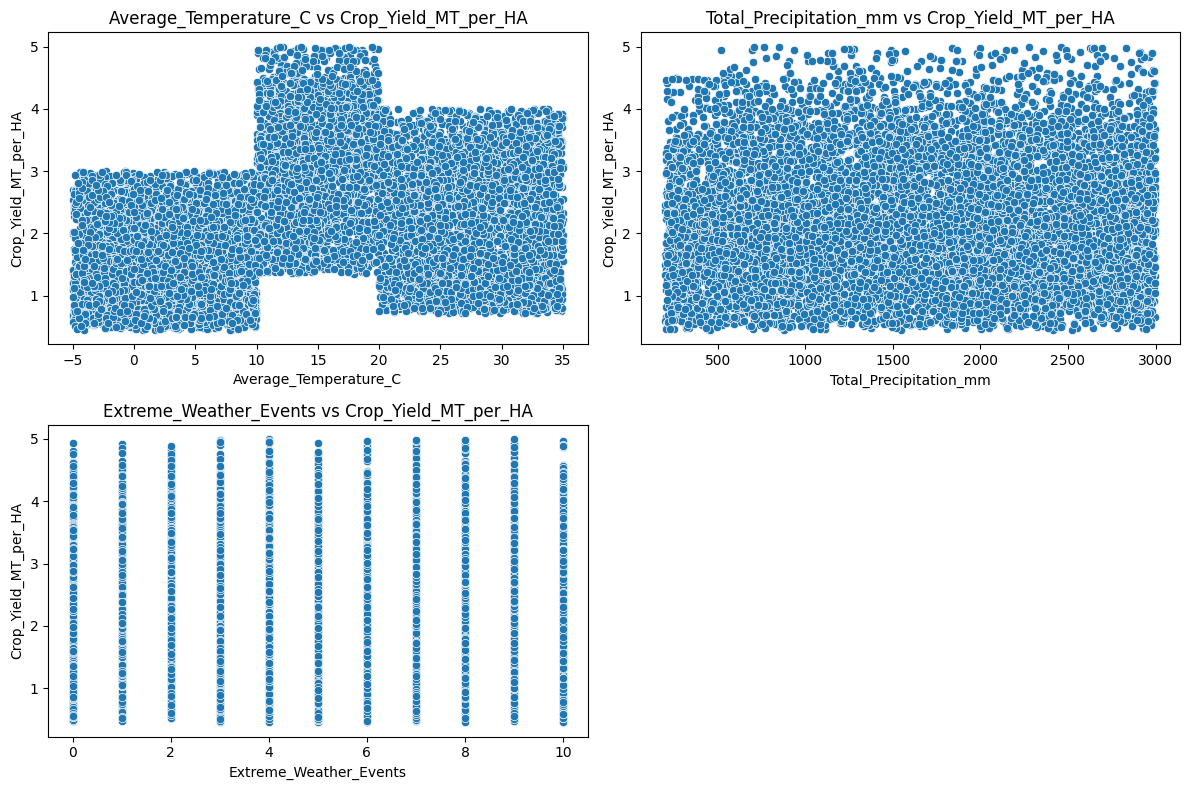

In [10]:
# диаграммы рассеяния ключевых признаков
plt.figure(figsize=(12, 8))
for i, feature in enumerate(key_features):
    plt.subplot(2, 2, i + 1)  # 2 строки, 2 столбца
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)

plt.tight_layout()
plt.show()

   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки.

In [11]:
X = df[['Average_Temperature_C', 'Total_Precipitation_mm']]
y = df['Crop_Yield_MT_per_HA']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

   - **Шаг 4**: Постройте модель линейной регрессии для оценки влияния температуры и уровня осадков на урожайность.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели.

In [12]:
model_2 = LinearRegression()
model_2.fit(X_train, y_train)

LinearRegression()

   - **Шаг 5**: Проведите оценку точности модели.
     - Выведите значения метрик MSE и R² и интерпретируйте их.

In [13]:
y_pred = model_2.predict(X_test)

mse_2 = mean_squared_error(y_test, y_pred)
rmse_2 = np.sqrt(mse_2)

# R^2
r2_2 = r2_score(y_test, y_pred)

# Вывод метрик
print(f"Среднеквадратическая ошибка (MSE): {mse_2:.4f}")
print(f"Корень из MSE (RMSE): {rmse_2:.4f}")
print(f"Коэффициент детерминации (R^2): {r2_2:.4f}")

Среднеквадратическая ошибка (MSE): 0.9275
Корень из MSE (RMSE): 0.9631
Коэффициент детерминации (R^2): 0.0720


   - **Шаг 6**: Визуализируйте данные и результаты модели:
     - Постройте график зависимости предсказанных значений от фактических.

In [14]:
results_2 = pd.DataFrame({
    'Real': y_test.values,
    'Predicted': y_pred
})
display(results_2.head(10))

,Real,Predicted
0,3.300,2.419635
1,1.629,1.967562
2,3.429,2.559087
3,2.100,2.379055
4,2.520,2.559862
5,1.512,2.683935
6,1.944,2.283195
7,2.700,2.105054
8,1.540,1.971703
9,0.864,2.647503


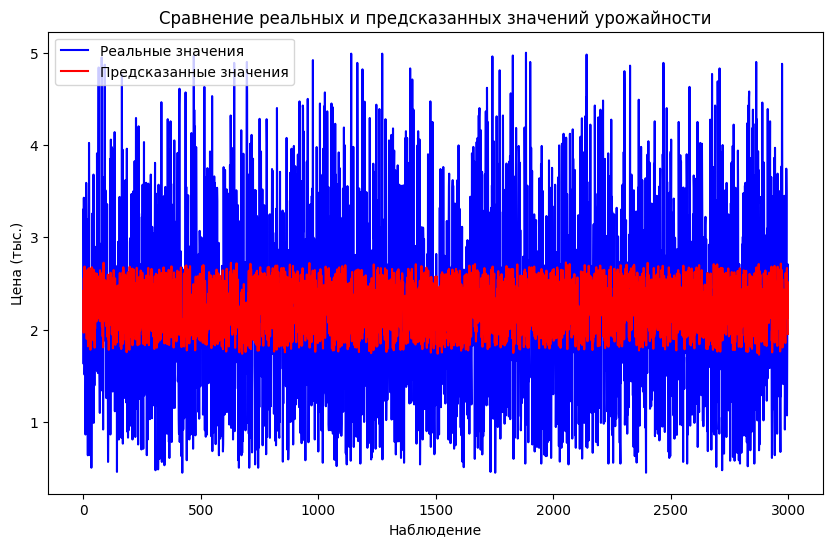

In [15]:
results_sorted_2 = results_2.sort_index()

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(results_sorted_2['Real'].values, label='Реальные значения', color='blue')
plt.plot(results_sorted_2['Predicted'].values, label='Предсказанные значения', color='red')
plt.legend()
plt.title('Сравнение реальных и предсказанных значений урожайности')
plt.xlabel('Наблюдение')
plt.ylabel('Цена (тыс.)')
plt.show()

## **Логистическая регрессия**


### **Задание №3. Классификация клиентов банка**:


   - **Шаг 1**: Загрузите набор данных о клиентах банка, включающий данные о возрасте, доходе, кредитной истории и других характеристиках.
     - **Совет**: Проверьте данные на наличие пропущенных значений и выбросов. Используйте стратегию заполнения пропусков средними значениями или медианой.

- Ссылка на набор данных: https://www.kaggle.com/datasets/henriqueyamahata/bank-marketing/data

In [ ]:
df = pd.read_csv('/content/bank-additional-full.csv', sep=';')

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


   - **Шаг 2**: Проведите анализ данных и предобработку:
     - Закодируйте категориальные переменные с помощью `OneHotEncoder` или `pd.get_dummies`.
     - Нормализуйте числовые признаки с помощью `StandardScaler` для улучшения обучения модели.
     - **Совет**: Убедитесь, что все признаки имеют одинаковый масштаб, чтобы избежать доминирования одного признака над другими.

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# Преобразование с использованием one-hot encoding
df_new = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], drop_first=True)

In [ ]:
print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp.var.rate                   41188 non-null  float64
 6   cons.price.idx                 41188 non-null  float64
 7   cons.conf.idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr.employed                    41188 non-null  float64
 10  job_blue-collar                41188 non-null  bool   
 11  job_entrepreneur               41188 non-null  bool   
 12  job_housemaid                  41188 non-null 

In [ ]:
X = df_new.drop('y_yes', axis=1)  # Матрица признаков
y = df_new['y_yes']               # Целевая переменная

In [ ]:
# https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки.


In [ ]:
# Преобразуем обратно в DataFrame с исходными именами столбцов
X = pd.DataFrame(X_scaled, columns=X.columns)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

   - **Шаг 4**: Постройте модель логистической регрессии для предсказания вероятности открытия депозитного счета клиентом.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели с помощью `LogisticRegression`.

In [ ]:
from sklearn.linear_model import LogisticRegression
model_3 = LogisticRegression()
model_3.fit(X_train, y_train)

LogisticRegression()

   - **Шаг 5**: Оцените качество модели с использованием метрик точности, полноты и F1-меры.
     - Выведите значения метрик и интерпретируйте их. Обратите внимание на баланс между точностью и полнотой.
    - Постройте матрицу ошибок с помощью `confusion_matrix` и визуализируйте ее с помощью `seaborn.heatmap`.

In [ ]:
# Предсказание на тестовых данных
y_pred = model_3.predict(X_test)

In [ ]:
# 3.3.2.9. Точность (precision), полнота (recall) и F-меры
#https://scikit-learn.ru/stable/modules/model_evaluation.html

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average="macro")
f1 = f1_score(y_test, y_pred, average="macro")

print(f"Точность: {accuracy:.4f}")
print(f"Полнота: {recall:.4f}")
print(f"F1-мера: {f1:.4f}")

Точность: 0.9101
Полнота: 0.6990
F1-мера: 0.7350


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Матрица ошибок')

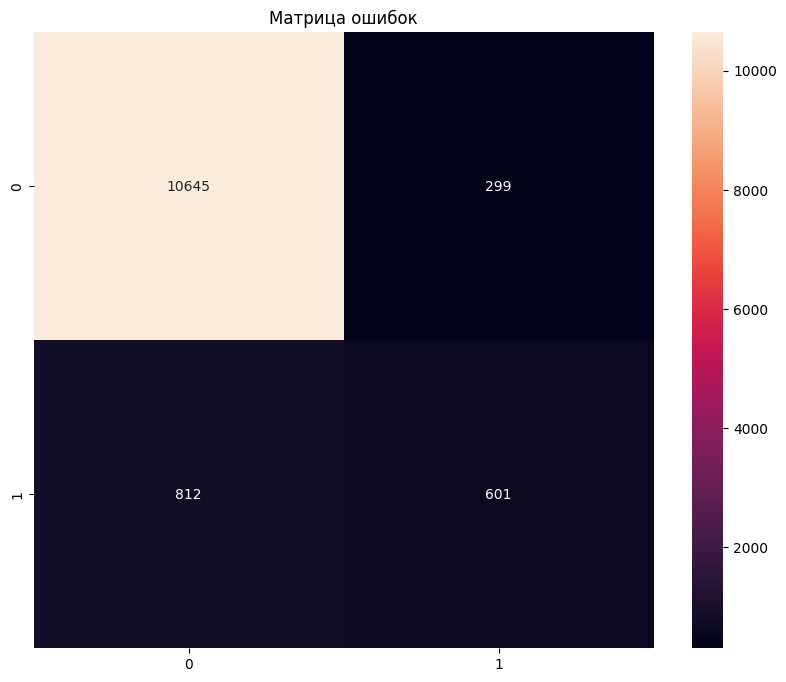

In [ ]:
conf_mat=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,fmt='d')
plt.title('Матрица ошибок')



   

   
   

   

   
   - **Шаг 6**: Визуализируйте ROC-кривую и вычислите AUC для оценки модели.
     - Используйте `roc_curve` и `auc` из `sklearn.metrics` для построения и расчета.

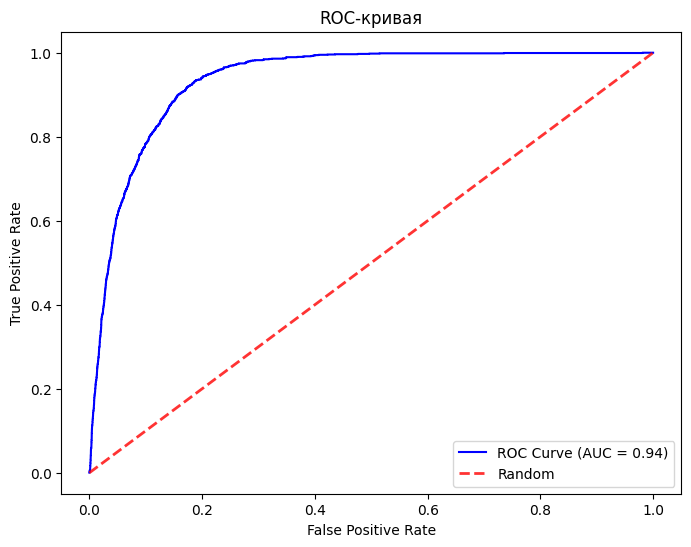

In [ ]:
# https://habr.com/ru/companies/netologyru/articles/582756/
# https://habr.com/ru/companies/otus/articles/809147/
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Получаем вероятности предсказания положительного класса
y_pred_proba = model_3.predict_proba(X_test)[:, 1]  # Вероятности для класса '1'
# Вычисляем ROC-кривую
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
# Вычисляем AUC
roc_auc = auc(fpr, tpr)
# Визуализация ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='red', label='Random', alpha=0.8)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.legend()
plt.show()

### **Задание №4. Распознавание спама**:


   - **Шаг 1**: Загрузите набор данных с текстами электронных писем, маркированных как "спам" или "не спам".
     - **Совет**: Проверьте данные на наличие пропущенных значений и оцените, какие признаки могут быть важными для классификации.

- Ссылка на набор данных: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [ ]:
df = pd.read_csv('/content/spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


   - **Шаг 2**: Выполните предварительную обработку текстов:
     - Выполните токенизацию и векторизацию с помощью `Word2Vec` или `Doc2Vec`.

In [ ]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Токенизация документов
documents = [TaggedDocument(words=row.split(), tags=[i]) for i, row in enumerate(df['v2'])]
# Обучение модели Doc2Vec
model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, epochs=100)
# Получение векторов документов
X = [model.infer_vector(doc.words) for doc in documents]
y = df['v1']

   - **Шаг 3**: Разделите данные на обучающую и тестовую выборки.

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=1)

   - **Шаг 4**: Постройте модель логистической регрессии для классификации писем на спам и не спам.
     - Используйте библиотеку `scikit-learn` для создания и обучения модели с помощью `LogisticRegression`.
     - Сравните результаты с моделью `MultinomialNB` *(Наивного Байеса)*

In [ ]:
from sklearn.linear_model import LogisticRegression

# Обучение модели логистической регрессии
l_model = LogisticRegression()
l_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
df_nb = pd.read_csv('/content/spam.csv', encoding='latin1')
df_nb = df_nb.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
X_nb = df_nb['v2']  # Матрица признаков
y_nb = df_nb['v1']               # Целевая переменная
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_nb = label_encoder.fit_transform(y_nb)
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(X_nb, y_nb,
                                                    test_size=0.3,
                                                    random_state=1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
# Определение шагов конвейера
pipeline = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),   # Преобразование текста в числовые признаки
    ('classifier', MultinomialNB())  # Мультиномиальный наивный байесовский классификатор
])
pipeline.fit(X_train_nb, y_train_nb)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('classifier', MultinomialNB())])

In [ ]:
y_pred_log = l_model.predict(X_test)
log_acc=accuracy_score(y_test,y_pred_log)
y_pred_nb = pipeline.predict(X_test_nb)
naive_acc=accuracy_score(y_test_nb,y_pred_nb)
print("Точность модели логистической регрессии:", log_acc)
print("Точность модели Наивного Байеса:", naive_acc)

Точность модели логистической регрессии: 0.9473684210526315
Точность модели Наивного Байеса: 0.9611244019138756


   - **Шаг 5**: Оцените качество моделей с помощью матрицы ошибок и ROC-кривой.
     - Постройте матрицу ошибок с помощью `confusion_matrix` и визуализируйте ее с помощью `seaborn.heatmap`.
     - Постройте ROC-кривую и вычислите AUC.

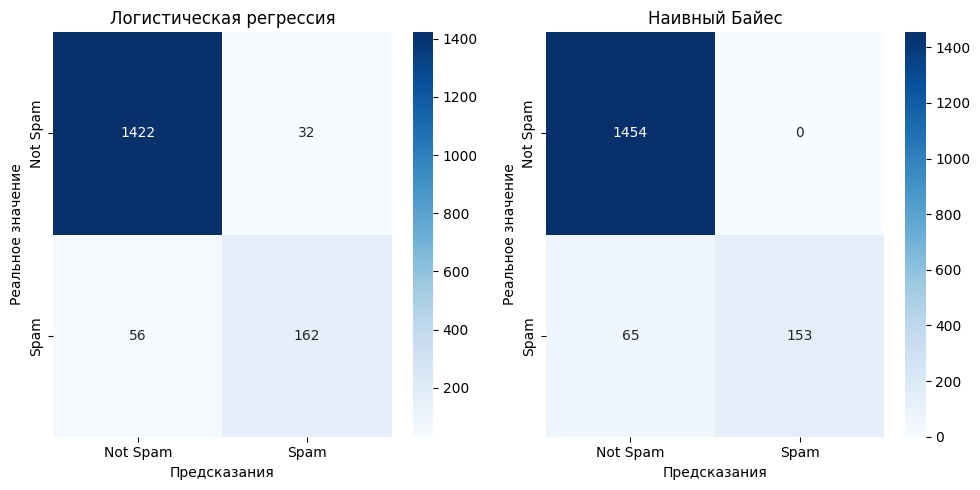

In [ ]:
confusion_log = confusion_matrix(y_test, y_pred_log)
confusion_nb = confusion_matrix(y_test_nb, y_pred_nb)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Логистическая регрессия')
plt.xlabel('Предсказания')
plt.ylabel('Реальное значение')

plt.subplot(1, 2, 2)
sns.heatmap(confusion_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Наивный Байес')
plt.xlabel('Предсказания')
plt.ylabel('Реальное значение')

plt.tight_layout()
plt.show()

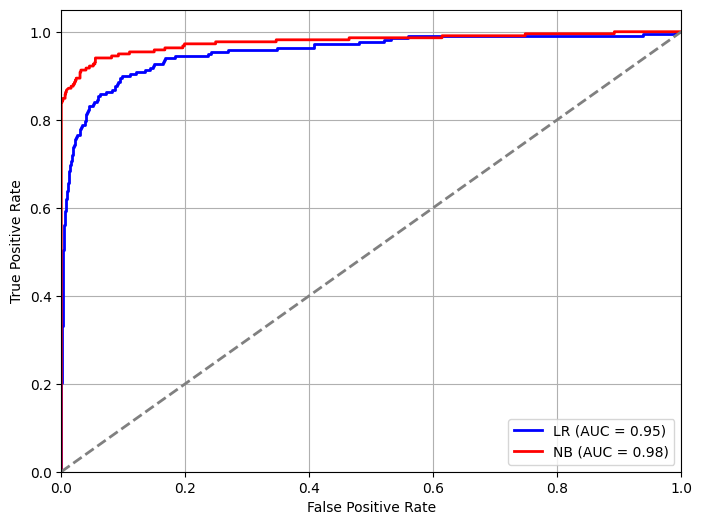

In [ ]:
label_encoder = LabelEncoder()
y_nb_encoded = label_encoder.fit_transform(y_nb)
y_pred_proba_log = l_model.predict_proba(X_test)[:, 1]
y_pred_proba_nb = pipeline.predict_proba(X_test_nb)[:, 1]
# ROC-кривая и AUC для LR
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_proba_log)
roc_auc_log = auc(fpr_log, tpr_log)

# ROC-кривая и AUC для NB
fpr_nb, tpr_nb, _ = roc_curve(y_test_nb, y_pred_proba_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Визуализация ROC-кривых
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, color='blue', lw=2, label='LR (AUC = %0.2f)' % roc_auc_log)
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='NB (AUC = %0.2f)' % roc_auc_nb)
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

   - **Шаг 6**: Визуализируйте результаты классификации и сравните их с исходными метками.
     - Приведите примеры писем, которые были неправильно классифицированы, и напишите возможные причины ошибок.

In [ ]:
# Создание DataFrame с реальными и предсказанными значениями
results_log = pd.DataFrame({
    'Real': y_test,
    'Predicted': y_pred_log
})

# Отображение первых 10 значений
display(results_log.head(10))

,Real,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


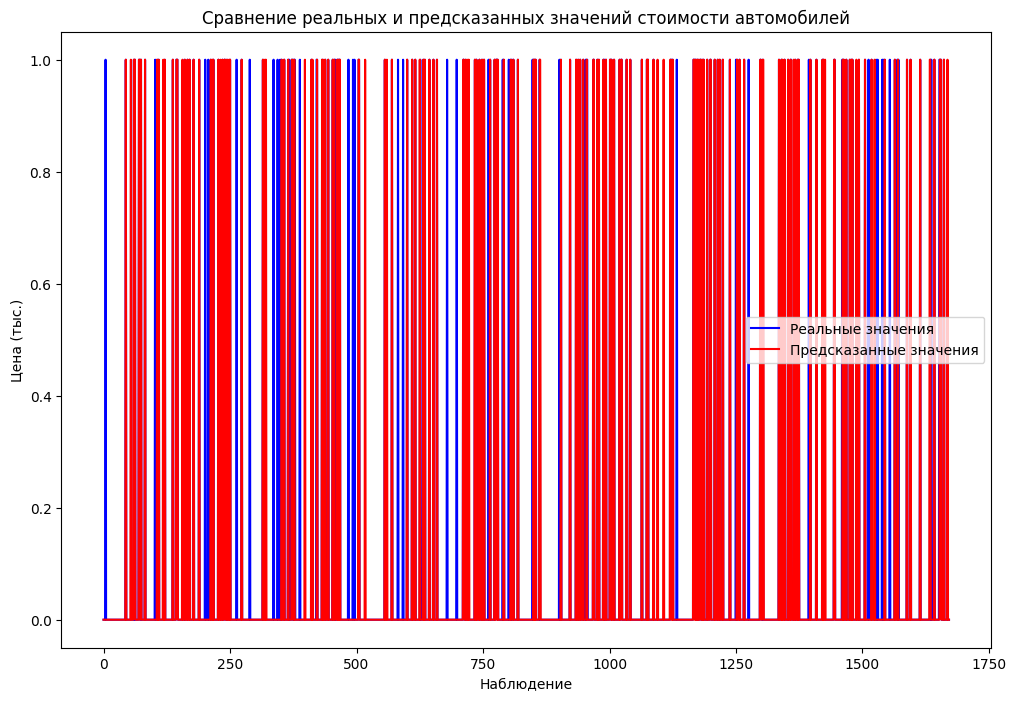

In [ ]:
# Сортировка значений для визуализации
results_sorted_log = results_log.sort_index()

# Построение графика
plt.figure(figsize=(12, 8))
plt.plot(results_sorted_log['Real'].values, label='Реальные значения', color='blue')
plt.plot(results_sorted_log['Predicted'].values, label='Предсказанные значения', color='red')
plt.legend()
plt.title('Сравнение реальных и предсказанных значений стоимости автомобилей')
plt.xlabel('Наблюдение')
plt.ylabel('Цена (тыс.)')
plt.show()

,Real,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


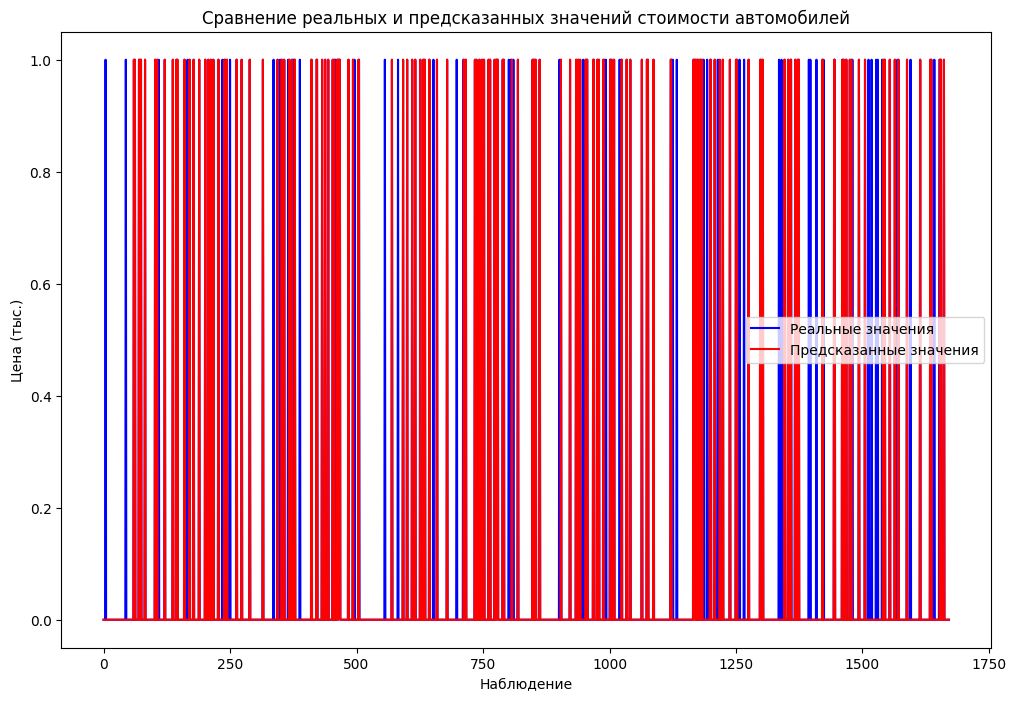

In [ ]:
results_nb = pd.DataFrame({
    'Real': y_test_nb,
    'Predicted': y_pred_nb
})

display(results_nb.head(10))

results_sorted_nb = results_nb.sort_index()
plt.figure(figsize=(12, 8))
plt.plot(results_sorted_nb['Real'].values, label='Реальные значения', color='blue')
plt.plot(results_sorted_nb['Predicted'].values, label='Предсказанные значения', color='red')
plt.legend()
plt.title('Сравнение реальных и предсказанных значений стоимости автомобилей')
plt.xlabel('Наблюдение')
plt.ylabel('Цена (тыс.)')
plt.show()